 In Information Retrieval tasks with binary classification (relevant or not relevant), precision is the fraction of retrieved instances that are relevant, while recall is the fraction of relevant instances that are retrieved. 

__Precision-Recall__ is a useful measure of success of prediction when the classes are very imbalanced (_in other words, if we were to use a regular Confision Matrix then the amount of True Negatives would have been quite large thus overshadowing the other cases_).

<div class="alert alert-block alert-info">
_Suppose a computer program for recognizing dogs in photographs identifies eight dogs in a picture containing 12 dogs and some cats. Of the eight dogs identified, five actually are dogs (true positives), while the rest are cats (false positives). The program's precision is 5/8 while its recall is 5/12._
<br/>
This pattern recognition example contained 8 − 5 = 3 type I errors and 12 − 5 = 7 type II errors. **Precision can be seen as a <u>measure of exactness or quality</u>, whereas recall is a <u>measure of completeness</u> or quantity.**
</div>

* __Precision__ (aka Positive Predictive Value)- a measure of result relevancy. $ P = \frac{T_p}{T_p + F_p} $
* __Recall__ (aka Sensitivity) - measure of how many truly relevant results are returne. $ R = \frac{T_p}{T_p + F_n} $
<p/>

<img src="Precisionrecall.png"/>

* <font color="blue">Low Precision | High Recall</font><br/>
Returns many results, but most of its predicted labels are incorrect when compared to the training labels.
* <font color="blue">High Precision | Low Recall</font><br/>
Returns few results, but most of its predictions are correct.
* <font color="blue">High Precision | High Recall</font><br/>
Returns many results, with all results labeled correctly.

__The precision-recall curve shows the tradeoff between precision and recall for different threshold.__<br/>
A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to low false negative rate.
! High scores for both show that the classifier is returning accurate results (high orecision), as well as returning a majority of all positive results (high recall).



## Practice on Iris Plants Dataset
<img src="iris_dataset.png"/>
where target names are:<br>
0 - setosa<br>
1 - versicolor<br>
2 - virginica

In [1]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

At this stage the shape of X is (150, 4). I.e. we have 150 measurements (50 per each class) of 4 features: sepal length, sepal width, petal length, and petal width.

Now, let's add more, randomly generated, features (aka noise).

In [7]:
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape # n_samples = 150, n_features = 4
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
# X.shape = (150, 804)

In [9]:
# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)# Create a simple classifier

In [10]:
# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

Now, let's calculate the average precision score

In [11]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.88


## Plot the Precision-Recall curve

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

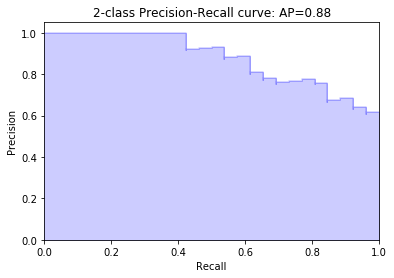

In [15]:
plt.show()